# DiploDatos 2019 - Análisis de Series Temporales

## Integrantes

| Nombre | e-mail |
|------|------|
|Rivadero, Isabel | isarivadero@hotmail.com |
|Vargas, Miguel | lvc0107@protonmail.com |
|Mancuso, Fernando | manquius@gmail.com |



## Introducción
En este práctico se propone explorar un dataset que contiene información de varias agencias de correo de Brasil, con el objetivo de extraer toda la información relevante sobre estos datos y presentarla de manera organizada y sencilla.
En estos datos vamos a encontrar información geográfica de los compradores y vendedores, el tipo de servicio por el que viajan los paquetes, el estado del paquete, algunas fechas relevantes y la cantidad de días hábiles que tardó el envío en llegar a su destino (target).

## Dataset

## Definiciones

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

cols = ['service',
        'sender_zipcode',
        'receiver_zipcode',
        'sender_state',
        'receiver_state',
        'shipment_type',
        'quantity',
        'status',
        'date_created',
        'date_sent',
        'date_visit',
        'target']
cols_holidays = ['holiday', 
                 'description']
data_path = './shipments_BR_201903.csv'
holidays = './holidays.csv'

### Datos
Los datos que vamos a cargar son un sample no uniforme que corresponde al mes de Marzo de 2019.

In [2]:
df = pd.read_csv(data_path, usecols=cols)
df.shape

(1000000, 12)

In [3]:
df.head()

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,target
0,SP,3005,SP,5409,express,1,0,done,2019-03-04 00:00:00,2019-03-05 13:24:00,2019-03-07 18:01:00,2
1,SP,17052,MG,37750,standard,1,1,done,2019-03-19 00:00:00,2019-03-20 14:44:00,2019-03-27 10:21:00,5
2,SP,2033,SP,11040,express,1,0,done,2019-02-18 00:00:00,2019-02-21 15:08:00,2019-02-28 18:19:00,5
3,SP,13900,SP,18500,express,1,0,done,2019-03-09 00:00:00,2019-03-11 15:48:00,2019-03-12 13:33:00,1
4,SP,4361,RS,96810,express,1,0,done,2019-03-08 00:00:00,2019-03-12 08:19:00,2019-03-16 08:24:00,4


#### Referencia de las columnas
* **service**: Identificador unico que corresponde a un tipo de servicio de un correo en particular.
* **sender_zipcode:** Código postal de quien envía el paquete (usualmente el vendedor).
* **receiver_zipcode:** Código postal de quien recibe el paquete (usualmente el comprador).
* **sender_state:** Nombre abreviado del estado de quien envía el paquete.
* **receiver_state:** Nombre abreviado del estado de quien recibe el paquete.
* **quantity:** Cantidad de items que tiene dentro el paquete.
* **status:** Estado final del envío.
* **date_created:** Fecha de compra de el o los items.
* **date_sent:** Fecha en que el correo recibe el paquete.
* **date_visit:** Fecha en que el correo entrega el paquete.
* **target:** Cantidad de dias hábiles que tardó el correo en entregar el paquete desde que lo recibe.


#### Feriados
Las series temporales se ven afectadas por los eventos que ocurren en cada fecha. Por esto es importante identificar los eventos sucedidos en cada fecha e identificar como afecta a nuestra serie.
En este caso, tendremos en cuenta los feriados de Brasil durante el año 2019.

In [4]:
df_h = pd.read_csv(holidays, usecols=cols_holidays)
df_h

,holiday,description
0,2019-02-12,Carnaval
1,2019-01-05,Dia de Reis
2,2019-01-24,[Feriado Municipal] Aniversário da Cidade conf...
3,2019-03-31,Páscoa
4,2019-04-21,Descobrimento do Brasil
5,2019-02-13,Carnaval
6,2019-04-20,Aniversário de Brasília
7,2019-12-24,Natal
8,2019-11-14,Proclamação da República
9,2019-04-18,Dia do Índio


Observamos 26 dias feriados a lo largo del año.

# Información general

In [5]:
import seaborn as sb
import matplotlib.pyplot as plt

Existen un total de 12 servicios que distribuyen 1000000 envios de manera eterogenea.

In [6]:
len(df)

1000000

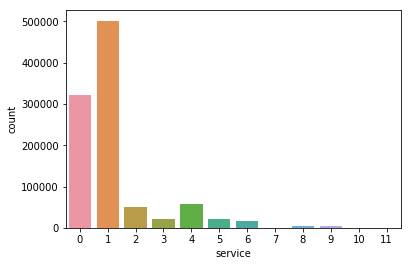

In [7]:
sb.countplot(data=df, x='service')

Asi mismo existen 3 tipos de envios que se distribuyen de la siguiente manera

La forma de envio mas comun es la Standard, seguida por el tipo express.

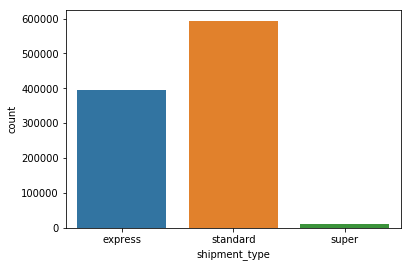

In [8]:
sb.countplot(data=df, x='shipment_type')

In [ ]:
df['shipment_type'].value_counts(normalize=True)

standard    0.593467
express     0.394600
super       0.011933
Name: shipment_type, dtype: float64

Existen tambien 945777 rutas, algunas de las cuales son mas transitadas que otras

In [ ]:
df['ruta'].value_counts()

6422-28943-0     69
6422-95095-0     56
5206-5203-0      51
37165-37165-0    41
3728-3727-0      35
9260-9280-0      32
9520-9520-0      29
2523-2523-0      29
6422-16015-0     29
14940-14940-0    28
9195-9606-0      28
14402-14403-0    26
6422-17050-0     24
1207-1207-0      24
13290-13212-6    23
6422-26510-0     21
6422-7092-0      21
6422-41650-0     20
6422-87370-0     20
6422-49160-0     20
13290-35162-6    20
14400-14400-0    20
14401-14401-0    20
13290-38400-6    19
13290-39400-6    18
6422-45602-0     17
13290-37701-6    17
13290-13214-6    17
13290-33200-6    17
13290-13481-6    17
                 ..
13500-31555-4     1
1210-11443-0      1
21044-29904-1     1
4346-4379-0       1
13060-72445-0     1
5043-88053-1      1
95670-97015-1     1
14400-44695-1     1
18080-13421-0     1
9171-13043-0      1
2442-13506-0      1
15800-13142-0     1
9751-6433-8       1
1209-36400-1      1
7097-95250-1      1
22640-40436-1     1
20756-4232-0      1
9891-84465-1      1
22755-3522-0      1


In [ ]:
df['ruta'].value_counts(normalize=True)

6422-28943-0     0.000069
6422-95095-0     0.000056
5206-5203-0      0.000051
37165-37165-0    0.000041
3728-3727-0      0.000035
9260-9280-0      0.000032
9520-9520-0      0.000029
2523-2523-0      0.000029
6422-16015-0     0.000029
14940-14940-0    0.000028
9195-9606-0      0.000028
14402-14403-0    0.000026
6422-17050-0     0.000024
1207-1207-0      0.000024
13290-13212-6    0.000023
6422-26510-0     0.000021
6422-7092-0      0.000021
6422-41650-0     0.000020
6422-87370-0     0.000020
6422-49160-0     0.000020
13290-35162-6    0.000020
14400-14400-0    0.000020
14401-14401-0    0.000020
13290-38400-6    0.000019
13290-39400-6    0.000018
6422-45602-0     0.000017
13290-37701-6    0.000017
13290-13214-6    0.000017
13290-33200-6    0.000017
13290-13481-6    0.000017
                   ...   
13500-31555-4    0.000001
1210-11443-0     0.000001
21044-29904-1    0.000001
4346-4379-0      0.000001
13060-72445-0    0.000001
5043-88053-1     0.000001
95670-97015-1    0.000001
14400-44695-

Puntos máximos y mínimos de cada feature

In [ ]:
df.max()

sender_state                         TO
sender_zipcode                    99990
receiver_state                       TO
receiver_zipcode                  99990
shipment_type                     super
quantity                              5
service                              11
status                             sent
date_created        2019-06-28 00:00:00
date_sent           2019-03-29 07:06:00
date_visit          2019-03-29 23:31:00
target                              118
ruta                      99990-44790-1
dtype: object

In [ ]:
df.min()

sender_state                         AC
sender_zipcode                     1001
receiver_state                       AC
receiver_zipcode                   1001
shipment_type                   express
quantity                              1
service                               0
status                        cancelled
date_created        2018-09-26 00:00:00
date_sent           2018-10-01 16:55:00
date_visit          2019-02-28 00:03:00
target                                0
ruta                       1001-11065-0
dtype: object

In [ ]:
df['target'].describe()

count    1000000.000000
mean           6.021577
std            5.157973
min            0.000000
25%            2.000000
50%            4.000000
75%            9.000000
max          118.000000
Name: target, dtype: float64

In [ ]:
(df['target'].max()-df['target'].min())/2

59.0

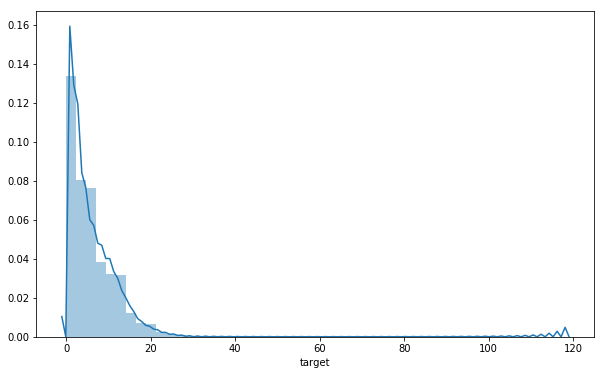

In [ ]:
plt.figure(figsize=(10,6))
sb.distplot(df['target'])

(array([1.80655e+05, 1.35145e+05, 1.07500e+05, 8.22500e+04, 6.87900e+04,
        1.11092e+05, 4.79370e+04, 4.23760e+04, 4.04610e+04, 3.58210e+04,
        3.02150e+04, 4.49210e+04, 1.62410e+04, 1.21330e+04, 9.72400e+03,
        7.34000e+03, 1.09140e+04, 4.01400e+03, 3.00800e+03, 2.30000e+03,
        1.76600e+03, 1.33400e+03, 1.78200e+03, 5.04000e+02, 3.70000e+02,
        2.33000e+02, 2.19000e+02, 2.97000e+02, 1.17000e+02, 9.40000e+01,
        7.10000e+01, 6.20000e+01, 5.90000e+01, 8.10000e+01, 1.70000e+01,
        1.80000e+01, 1.60000e+01, 2.20000e+01, 2.00000e+01, 1.10000e+01,
        1.30000e+01, 7.00000e+00, 3.00000e+00, 2.00000e+00, 8.00000e+00,
        5.00000e+00, 7.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        3.00000e+00, 0.00000e+00, 3.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00

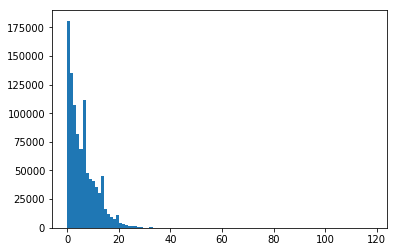

In [ ]:
plt.hist(df['target'],bins=100)

In [ ]:
a=df[df['target']<40]

In [ ]:
plt.figure(figsize=(10,6))
sb.distplot(a)

# Conclusion